In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/FINAL_PROJECT/class2/df4.csv')
df2 = pd.read_csv('/content/drive/MyDrive/FINAL_PROJECT/class2/df4_test.csv')

In [4]:
df2.drop(['uniqueID','date'],axis=1,inplace=True)

In [5]:
df = pd.concat([df1,df2],axis=0)

In [6]:
df['sentiment1'] = df["rating"].apply(lambda x: 1 if x > 5 else 0)

In [7]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,usefulCount,sentiment,clean_review,sentiment1
0,42825,Dicyclomine,Irritable Bowel Syndrome,"""I&#039;ve been on this a month and it&#039;s ...",1,5,negative,month horrible ibs go wave sometimes fine some...,0
1,121198,Nexplanon,Birth Control,"""I got this implanted in my arm, I like it! I ...",9,0,positive,got implanted arm like worry taking pill getti...,1
2,126670,Bupropion / naltrexone,Weight Loss,"""Been taking Contrave for 5 weeks, so just hit...",6,2,neutral,taking contrave week hit max dose pill pill pm...,1
3,113081,Depakote,Migraine Prevention,"""Depakote worked great as a migraine preventat...",1,34,negative,depakote worked great migraine preventative ca...,0
4,150213,Phentermine,Weight Loss,"""I am 23, 5&#039;4 and weighed 181 and current...",10,12,positive,weighed currently weigh started phentermine mg...,1


In [8]:
df =df .dropna()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(2,2),max_features=5000)

X = cv.fit_transform(df['clean_review'].values).toarray()

In [10]:
y = df.sentiment1

In [11]:
X_train = X[0:50000]
X_test = X[50000:]

y_train = y[0:50000]
y_test = y[50000:]

In [17]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
nl_model = MultinomialNB().fit(X_train, y_train)

y_pred_lemma_cv=nl_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score:',accuracy_score(y_test,y_pred_lemma_cv))

accuracy score: 0.7173652162318326


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lemma_cv))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71     10688
           1       0.75      0.69      0.72     11811

    accuracy                           0.72     22499
   macro avg       0.72      0.72      0.72     22499
weighted avg       0.72      0.72      0.72     22499



In [12]:
from sklearn.ensemble import RandomForestClassifier
clf3=  RandomForestClassifier(random_state=0)

In [13]:
spam_detect_model_rf = clf3.fit(X_train, y_train)

y_pred_lemma_cv=spam_detect_model_rf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lemma_cv))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     10688
           1       0.79      0.73      0.76     11811

    accuracy                           0.76     22499
   macro avg       0.76      0.76      0.76     22499
weighted avg       0.76      0.76      0.76     22499



In [20]:
from sklearn.metrics import precision_score , recall_score , f1_score
print('precision score:',precision_score(y_test,y_pred_lemma_cv))
print('recall score:',recall_score(y_test,y_pred_lemma_cv))
print('f1  score:',f1_score(y_test,y_pred_lemma_cv))

precision score: 0.7491773308957953
recall score: 0.6939293878587757
f1  score: 0.7204958023823128


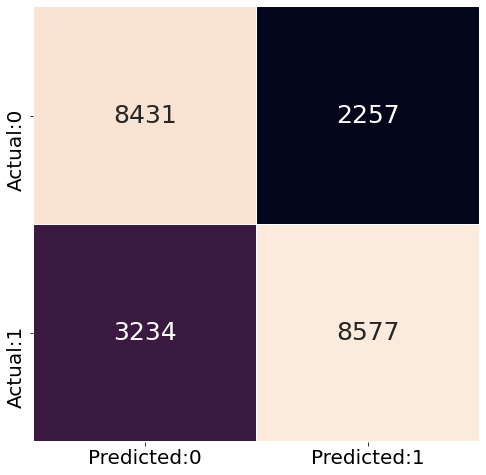

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lemma_cv)
plt.figure(figsize=(8,8))
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [16]:
from sklearn.metrics import precision_score , recall_score , f1_score
print('precision score:',precision_score(y_test,y_pred_lemma_cv))
print('recall score:',recall_score(y_test,y_pred_lemma_cv))
print('f1  score:',f1_score(y_test,y_pred_lemma_cv))

precision score: 0.7916743585010153
recall score: 0.7261874523749048
f1  score: 0.757518215941709


In [ ]:
rf = RandomForestClassifier(max_features='log2',n_estimators=700,random_state=0,n_jobs=-1,verbose=2)
spam_detect_model_rf = rf.fit(X_train, y_train)

y_pred_lemma_cv=spam_detect_model_rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 700
building tree 2 of 700
building tree 3 of 700
building tree 4 of 700
building tree 5 of 700
building tree 6 of 700
building tree 7 of 700
building tree 8 of 700
building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700
building tree 14 of 700
building tree 15 of 700
building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700
building tree 22 of 700
building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700
building tree 28 of 700
building tree 29 of 700
building tree 30 of 700
building tree 31 of 700
building tree 32 of 700
building tree 33 of 700
building tree 34 of 700
building tree 35 of 700
building tree 36 of 700
building tree 37 of 700
building tree 38 of 700
building tree 39 of 700


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min


building tree 40 of 700
building tree 41 of 700
building tree 42 of 700
building tree 43 of 700
building tree 44 of 700
building tree 45 of 700
building tree 46 of 700
building tree 47 of 700
building tree 48 of 700
building tree 49 of 700
building tree 50 of 700
building tree 51 of 700
building tree 52 of 700
building tree 53 of 700
building tree 54 of 700
building tree 55 of 700
building tree 56 of 700
building tree 57 of 700
building tree 58 of 700
building tree 59 of 700
building tree 60 of 700
building tree 61 of 700
building tree 62 of 700
building tree 63 of 700
building tree 64 of 700
building tree 65 of 700
building tree 66 of 700
building tree 67 of 700
building tree 68 of 700
building tree 69 of 700
building tree 70 of 700
building tree 71 of 700
building tree 72 of 700
building tree 73 of 700
building tree 74 of 700
building tree 75 of 700
building tree 76 of 700
building tree 77 of 700
building tree 78 of 700
building tree 79 of 700
building tree 80 of 700
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.2min


building tree 160 of 700
building tree 161 of 700
building tree 162 of 700
building tree 163 of 700
building tree 164 of 700
building tree 165 of 700
building tree 166 of 700
building tree 167 of 700
building tree 168 of 700
building tree 169 of 700
building tree 170 of 700
building tree 171 of 700
building tree 172 of 700
building tree 173 of 700
building tree 174 of 700
building tree 175 of 700
building tree 176 of 700
building tree 177 of 700
building tree 178 of 700
building tree 179 of 700
building tree 180 of 700
building tree 181 of 700
building tree 182 of 700
building tree 183 of 700
building tree 184 of 700
building tree 185 of 700
building tree 186 of 700
building tree 187 of 700
building tree 188 of 700
building tree 189 of 700
building tree 190 of 700
building tree 191 of 700
building tree 192 of 700
building tree 193 of 700
building tree 194 of 700
building tree 195 of 700
building tree 196 of 700
building tree 197 of 700
building tree 198 of 700
building tree 199 of 700


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 16.4min


building tree 363 of 700
building tree 364 of 700
building tree 365 of 700
building tree 366 of 700
building tree 367 of 700
building tree 368 of 700
building tree 369 of 700
building tree 370 of 700
building tree 371 of 700
building tree 372 of 700
building tree 373 of 700
building tree 374 of 700
building tree 375 of 700
building tree 376 of 700
building tree 377 of 700
building tree 378 of 700
building tree 379 of 700
building tree 380 of 700
building tree 381 of 700
building tree 382 of 700
building tree 383 of 700
building tree 384 of 700
building tree 385 of 700
building tree 386 of 700
building tree 387 of 700
building tree 388 of 700
building tree 389 of 700
building tree 390 of 700
building tree 391 of 700
building tree 392 of 700
building tree 393 of 700
building tree 394 of 700
building tree 395 of 700
building tree 396 of 700
building tree 397 of 700
building tree 398 of 700
building tree 399 of 700
building tree 400 of 700
building tree 401 of 700
building tree 402 of 700


[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 29.2min


building tree 646 of 700
building tree 647 of 700
building tree 648 of 700
building tree 649 of 700
building tree 650 of 700
building tree 651 of 700
building tree 652 of 700
building tree 653 of 700
building tree 654 of 700
building tree 655 of 700
building tree 656 of 700
building tree 657 of 700
building tree 658 of 700
building tree 659 of 700
building tree 660 of 700
building tree 661 of 700
building tree 662 of 700
building tree 663 of 700
building tree 664 of 700
building tree 665 of 700
building tree 666 of 700
building tree 667 of 700
building tree 668 of 700
building tree 669 of 700
building tree 670 of 700
building tree 671 of 700
building tree 672 of 700
building tree 673 of 700
building tree 674 of 700
building tree 675 of 700
building tree 676 of 700
building tree 677 of 700
building tree 678 of 700
building tree 679 of 700
building tree 680 of 700
building tree 681 of 700
building tree 682 of 700
building tree 683 of 700
building tree 684 of 700
building tree 685 of 700


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 31.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   10.5s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   24.0s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:   42.9s
[Parallel(n_jobs=2)]: Done 700 out of 700 | elapsed:   46.4s finished


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lemma_cv))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     10688
           1       0.81      0.74      0.77     11811

    accuracy                           0.77     22499
   macro avg       0.77      0.77      0.77     22499
weighted avg       0.77      0.77      0.77     22499



In [ ]:
import math

In [16]:
%%time
#
_,features = X_test.shape
accuracy_list = {}


## our grid exaustive search parameters
m_features_names = ["log2(M)"]
m_features = [int(math.log2(features))]
num_trees = [400,500,600,700]

for m,m_name in zip(m_features,m_features_names):
    accuracy_list[m_name] = []
    for tr in num_trees:
        rfc_rating = RandomForestClassifier(n_estimators=tr,max_features=m,n_jobs=-1,verbose=2, random_state=42 )
        rfc_rating.fit(X_train, y_train)
        accuracy = rfc_rating.score(X_test, y_test)
        accuracy_list[m_name].append(accuracy)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.0min


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 15.8min


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 17.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   10.7s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   24.4s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   27.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min


building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.0min


building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 15.8min


building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 21.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   10.8s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   24.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   33.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min


building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600
building tree 44 of 600
building tree 45 of 600
building tree 46 of 600
building tree 47 of 600
building tree 48 of 600
building tree 49 of 600
building tree 50 of 600
building tree 51 of 600
building tree 52 of 600
building tree 53 of 600
building tree 54 of 600
building tree 55 of 600
building tree 56 of 600
building tree 57 of 600
building tree 58 of 600
building tree 59 of 600
building tree 60 of 600
building tree 61 of 600
building tree 62 of 600
building tree 63 of 600
building tree 64 of 600
building tree 65 of 600
building tree 66 of 600
building tree 67 of 600
building tree 68 of 600
building tree 69 of 600
building tree 70 of 600
building tree 71 of 600
building tree 72 of 600
building tree 73 of 600
building tree 74 of 600
building tree 75 of 600
building tree 76 of 600
building tree 77 of 600
building tree 78 of 600
building tree 79 of 600
building tree 80 of 600
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.0min


building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 173 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 181 of 600
building tree 182 of 600
building tree 183 of 600
building tree 184 of 600
building tree 185 of 600
building tree 186 of 600
building tree 187 of 600
building tree 188 of 600
building tree 189 of 600
building tree 190 of 600
building tree 191 of 600
building tree 192 of 600
building tree 193 of 600
building tree 194 of 600
building tree 195 of 600
building tree 196 of 600
building tree 197 of 600
building tree 198 of 600
building tree 199 of 600


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 15.9min


building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 385 of 600
building tree 386 of 600
building tree 387 of 600
building tree 388 of 600
building tree 389 of 600
building tree 390 of 600
building tree 391 of 600
building tree 392 of 600
building tree 393 of 600
building tree 394 of 600
building tree 395 of 600
building tree 396 of 600
building tree 397 of 600
building tree 398 of 600
building tree 399 of 600
building tree 400 of 600
building tree 401 of 600
building tree 402 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 26.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   10.3s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   24.2s
[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:   40.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 700building tree 2 of 700

building tree 3 of 700
building tree 4 of 700
building tree 5 of 700
building tree 6 of 700
building tree 7 of 700
building tree 8 of 700
building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700
building tree 14 of 700
building tree 15 of 700
building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700
building tree 22 of 700
building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700
building tree 28 of 700
building tree 29 of 700
building tree 30 of 700
building tree 31 of 700
building tree 32 of 700
building tree 33 of 700
building tree 34 of 700
building tree 35 of 700
building tree 36 of 700
building tree 37 of 700
building tree 38 of 700


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min


building tree 39 of 700
building tree 40 of 700
building tree 41 of 700
building tree 42 of 700
building tree 43 of 700
building tree 44 of 700
building tree 45 of 700
building tree 46 of 700
building tree 47 of 700
building tree 48 of 700
building tree 49 of 700
building tree 50 of 700
building tree 51 of 700
building tree 52 of 700
building tree 53 of 700
building tree 54 of 700
building tree 55 of 700
building tree 56 of 700
building tree 57 of 700
building tree 58 of 700
building tree 59 of 700
building tree 60 of 700
building tree 61 of 700
building tree 62 of 700
building tree 63 of 700
building tree 64 of 700
building tree 65 of 700
building tree 66 of 700
building tree 67 of 700
building tree 68 of 700
building tree 69 of 700
building tree 70 of 700
building tree 71 of 700
building tree 72 of 700
building tree 73 of 700
building tree 74 of 700
building tree 75 of 700
building tree 76 of 700
building tree 77 of 700
building tree 78 of 700
building tree 79 of 700
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.0min


building tree 160 of 700
building tree 161 of 700
building tree 162 of 700
building tree 163 of 700
building tree 164 of 700
building tree 165 of 700
building tree 166 of 700
building tree 167 of 700
building tree 168 of 700
building tree 169 of 700
building tree 170 of 700
building tree 171 of 700
building tree 172 of 700
building tree 173 of 700
building tree 174 of 700
building tree 175 of 700
building tree 176 of 700
building tree 177 of 700
building tree 178 of 700
building tree 179 of 700
building tree 180 of 700
building tree 181 of 700
building tree 182 of 700
building tree 183 of 700
building tree 184 of 700
building tree 185 of 700
building tree 186 of 700building tree 187 of 700

building tree 188 of 700
building tree 189 of 700
building tree 190 of 700
building tree 191 of 700
building tree 192 of 700
building tree 193 of 700
building tree 194 of 700
building tree 195 of 700
building tree 196 of 700
building tree 197 of 700
building tree 198 of 700
building tree 199 of 700


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 16.0min


building tree 363 of 700
building tree 364 of 700
building tree 365 of 700
building tree 366 of 700
building tree 367 of 700
building tree 368 of 700
building tree 369 of 700
building tree 370 of 700
building tree 371 of 700
building tree 372 of 700
building tree 373 of 700
building tree 374 of 700
building tree 375 of 700
building tree 376 of 700
building tree 377 of 700
building tree 378 of 700
building tree 379 of 700
building tree 380 of 700
building tree 381 of 700
building tree 382 of 700
building tree 383 of 700
building tree 384 of 700
building tree 385 of 700
building tree 386 of 700
building tree 387 of 700
building tree 388 of 700
building tree 389 of 700
building tree 390 of 700
building tree 391 of 700
building tree 392 of 700
building tree 393 of 700
building tree 394 of 700
building tree 395 of 700
building tree 396 of 700
building tree 397 of 700
building tree 398 of 700
building tree 399 of 700
building tree 400 of 700
building tree 401 of 700
building tree 402 of 700


[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 28.3min


building tree 646 of 700
building tree 647 of 700
building tree 648 of 700
building tree 649 of 700
building tree 650 of 700
building tree 651 of 700
building tree 652 of 700
building tree 653 of 700
building tree 654 of 700
building tree 655 of 700
building tree 656 of 700
building tree 657 of 700
building tree 658 of 700
building tree 659 of 700
building tree 660 of 700
building tree 661 of 700
building tree 662 of 700
building tree 663 of 700
building tree 664 of 700
building tree 665 of 700
building tree 666 of 700
building tree 667 of 700
building tree 668 of 700
building tree 669 of 700
building tree 670 of 700
building tree 671 of 700
building tree 672 of 700
building tree 673 of 700
building tree 674 of 700
building tree 675 of 700
building tree 676 of 700
building tree 677 of 700
building tree 678 of 700
building tree 679 of 700
building tree 680 of 700
building tree 681 of 700
building tree 682 of 700
building tree 683 of 700
building tree 684 of 700
building tree 685 of 700


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 30.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   11.3s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   25.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:   44.5s


CPU times: user 3h 13min 34s, sys: 32.9 s, total: 3h 14min 7s
Wall time: 1h 39min 13s


[Parallel(n_jobs=2)]: Done 700 out of 700 | elapsed:   48.4s finished


In [17]:
accuracy_list

{'log2(M)': [0.7695453131250278,
  0.7711898306591404,
  0.7711898306591404,
  0.7699897773234365]}

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf3=  RandomForestClassifier(random_state=0,n_estimators=600,max_features='log2')

In [23]:
spam_detect_model_rf = clf3.fit(X_train, y_train)

y_pred_lemma_cv=spam_detect_model_rf.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lemma_cv))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     10688
           1       0.81      0.74      0.77     11811

    accuracy                           0.77     22499
   macro avg       0.77      0.77      0.77     22499
weighted avg       0.77      0.77      0.77     22499



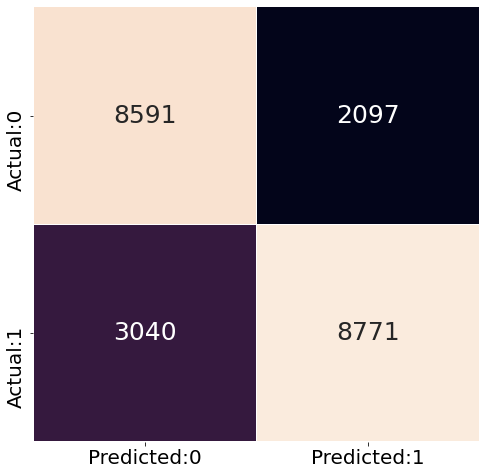

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lemma_cv)
plt.figure(figsize=(8,8))
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [26]:
from sklearn.metrics import precision_score , recall_score , f1_score
print('precision score:',precision_score(y_test,y_pred_lemma_cv))
print('recall score:',recall_score(y_test,y_pred_lemma_cv))
print('f1  score:',f1_score(y_test,y_pred_lemma_cv))

precision score: 0.8070482149429518
recall score: 0.7426128185589704
f1  score: 0.7734908946602583


In [12]:
from xgboost import XGBClassifier
xg=  XGBClassifier(objective= 'binary:logistic')

In [13]:
spam_detect_model_rf = xg.fit(X_train, y_train)

y_pred_lemma_cv=spam_detect_model_rf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lemma_cv))

              precision    recall  f1-score   support

           0       0.56      0.81      0.66     10688
           1       0.71      0.43      0.54     11811

    accuracy                           0.61     22499
   macro avg       0.64      0.62      0.60     22499
weighted avg       0.64      0.61      0.60     22499



In [16]:
from sklearn.metrics import precision_score , recall_score , f1_score
print('precision score:',precision_score(y_test,y_pred_lemma_cv))
print('recall score:',recall_score(y_test,y_pred_lemma_cv))
print('f1  score:',f1_score(y_test,y_pred_lemma_cv))

precision score: 0.714891212206838
recall score: 0.42841419016171367
f1  score: 0.535761554343798


In [19]:
df2.head()

,Unnamed: 0,drugName,condition,review,rating,usefulCount,sentiment,clean_review
0,18758,Mirena,Birth Control,"""I have had the mirena in for nearly a year. I...",10,3,positive,mirena nearly year kid getting inserted bother...
1,39109,Chantix,Smoking Cessation,"""This is my second go around with Chantix -- t...",9,12,positive,second go around chantix last time year ago se...
2,19589,Medroxyprogesterone,Birth Control,"""I&#039;ve been on Depo for about 7 years. My...",8,6,positive,depo year doctor never told long others would ...
3,256,Suprep Bowel Prep Kit,Bowel Preparation,"""Overall experience is ok. My mix: refrigerate...",8,15,positive,overall experience ok mix refrigerated suprep ...
4,33264,Ranitidine,GERD,"""I am taking prescription Zantac 150 and not s...",10,55,positive,taking prescription zantac sure difference cou...
